In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import nltk

import string
from bs4 import BeautifulSoup
import re 
import seaborn as sns

from nltk.corpus import stopwords

In [19]:
df = pd.read_csv(r'C:\Users\anami\OneDrive\Desktop\NLP\Datasets\sample_10k_data_for_visualization\sample_10k_data_for_visualization.csv')

In [27]:
stop_words = set(stopwords.words('english')) 
punc = string.punctuation

df["article"] = df["article"].apply(eval)
df["abstract"] = df["abstract"].apply(eval)

In [29]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    tokens = [w for w in newString.split() if not w in stop_words]
    tokens = [char for char in tokens if not char in punc]
    
    return (" ".join(tokens)).strip()

In [30]:
df["article_clean"] = df["article"].apply(text_cleaner)
df["abstract_clean"] = df["abstract"].apply(text_cleaner)

C:\Users\anami\.conda\envs\ml\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\anami\.conda\envs\ml\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [31]:
print(df)

                                               abstract  \
0     b' we study possible connection of the d+@xmat...   
1     b' in order to satisfy processing time constra...   
2     b' starting from an asymptotically correct thr...   
3     b' a comparison of the rates for @xmath0 , @xm...   
4     b' we study five dimensional thin - shell worm...   
...                                                 ...   
9995  b' analysis of data from an affymetrix latin s...   
9996  b' in this paper we study the classification o...   
9997  b' we predict two new physical effects in arra...   
9998  b' the adiabatic solutions of maxwell - bloch ...   
9999  b' the heating associated with the deposition ...   

                                                article  \
0     b"it was demonstrated @xcite , that dp elastic...   
1     b'music summarization has been the subject of ...   
2     b"one of the most important tasks of high ener...   
3     b'the branching fractions for the leptonic dec...

In [32]:
print(df['article_clean'][1])

music summarization subject research least decade many algorithms address problem mainly popular music published past @xcite however algorithms focus producing human consumption oriented summaries i.e. summaries listened people motivated need quickly get gist whole song without listen type summarization entails extra requirements besides conciseness diversity non redundancy clarity coherence people enjoy listening generic summarization algorithms however focus extracting concise diverse summaries successfully applied text speech summarization @xcite application music human consumption oriented purposes ideal select concatenate relevant diverse information according algorithm definition relevance diversity without taking account whether output enjoyable people usually reflected instance discontinuities irregularities beat synchronization resulting summaries focus improving performance tasks recognized important community e.g. music genre classification summarization opposed considering 

In [33]:
print(df['abstract_clean'][1])

order satisfy processing time constraints many tasks process segment whole music signal may lead decreasing performance important information tasks may processed segments leverage generic summarization algorithms previously applied text speech summarize items music datasets algorithms build summaries concise diverse selecting appropriate segments input signal also making good candidates summarize music evaluate summarization process binary multiclass music genre classification tasks comparing accuracy using summarized datasets accuracy using human oriented summaries continuous segments traditional method used addressing previously mentioned time constraints full songs original dataset show lexrank support sets based centrality model improve classification performance compared selected baselines also show summarized datasets lead classification performance whose difference statistically significant using full songs furthermore make argument stating advantages sharing summarized datasets

**Graphs for lengths of texts**

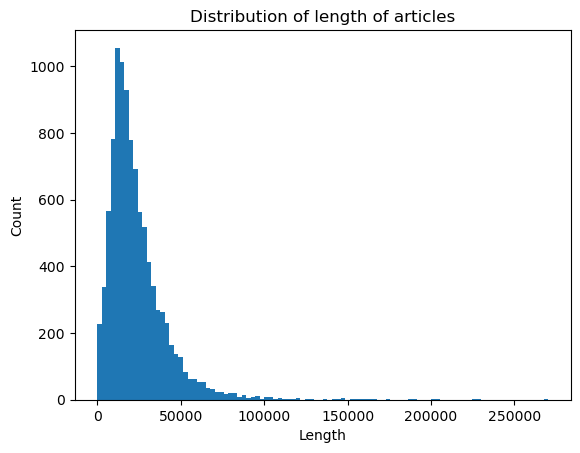

In [34]:
# Plot a histogram of the length of the articles
plt.hist(df['article_clean'].apply(len), bins=100)
plt.title('Distribution of length of articles')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

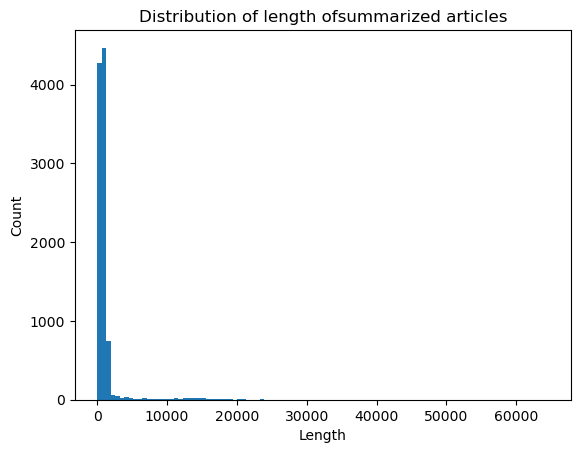

In [36]:
# Plot a histogram of the length of the summarized articles
plt.hist(df['abstract_clean'].apply(len), bins=100)
plt.title('Distribution of length ofsummarized articles')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

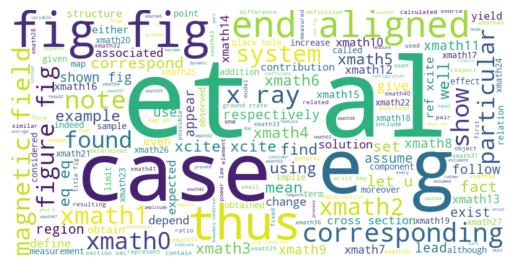

In [38]:
from wordcloud import WordCloud

# Concatenate all the entire articles into one string
entire_articles = ' '.join(df['article_clean'])

# Generate a word cloud from the entire articles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(entire_articles)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**AVG and MAX sentence/summary lengths**

In [9]:
# Tokenize the sentences and summaries
df['sentences'] = df['article'].apply(nltk.sent_tokenize)
df['summaries'] = df['abstract'].apply(nltk.sent_tokenize)

In [10]:
# Calculate the average and maximum sentence length
df['sentence_lengths'] = df['sentences'].apply(lambda x: [len(nltk.word_tokenize(sentence)) for sentence in x])
df['avg_sentence_length'] = df['sentence_lengths'].apply(lambda x: sum(x) / len(x))
df['max_sentence_length'] = df['sentence_lengths'].apply(max)

In [11]:
# Calculate the average and maximum summary length
df['summary_lengths'] = df['summaries'].apply(lambda x: [len(nltk.word_tokenize(sentence)) for sentence in x])
df['avg_summary_length'] = df['summary_lengths'].apply(lambda x: sum(x) / len(x))
df['max_summary_length'] = df['summary_lengths'].apply(max)

In [12]:
# Print the average and maximum lengths of sentences and summaries
print('Average sentence length: {:.2f}'.format(df['avg_sentence_length'].mean()))
print('Maximum sentence length: {}'.format(df['max_sentence_length'].max()))
print('Average summary length: {:.2f}'.format(df['avg_summary_length'].mean()))
print('Maximum summary length: {}'.format(df['max_summary_length'].max()))

Average sentence length: 83.71
Maximum sentence length: 42382
Average summary length: 29.90
Maximum summary length: 14812


In [39]:
df.head(5)

,abstract,article,section_names,article_clean,abstract_clean,sentences,summaries,sentence_lengths
0,b' we study possible connection of the d+@xmat...,"b""it was demonstrated @xcite , that dp elastic...",b'introduction\nminimal relativization of the ...,demonstrated @xcite dp elastic scattering @xma...,study possible connection d+@xmath0he backward...,[demonstrated @xcite dp elastic scattering @xm...,[study possible connection d+@xmath0he backwar...,"[64, 274, 75, 109, 509]"
1,b' in order to satisfy processing time constra...,b'music summarization has been the subject of ...,b'introduction\nmusic summarization\ngeneric s...,music summarization subject research least dec...,order satisfy processing time constraints many...,[music summarization subject research least de...,[order satisfy processing time constraints man...,"[27, 85, 274, 562, 419, 74, 60, 21, 73, 334, 4..."
2,b' starting from an asymptotically correct thr...,"b""one of the most important tasks of high ener...",b'introduction\ncoulomb corrections to three-b...,one important tasks high energy heavy ion stud...,starting asymptotically correct three body cou...,[one important tasks high energy heavy ion stu...,[starting asymptotically correct three body co...,"[409, 226, 153, 22, 268, 9, 184, 138, 10, 269,..."
3,"b' a comparison of the rates for @xmath0 , @xm...",b'the branching fractions for the leptonic dec...,b'introduction\nthe bes detector\ntechnique\ne...,branching fractions leptonic decays @xmath9 @x...,comparison rates @xmath0 @xmath1 @xmath2 anyth...,[branching fractions leptonic decays @xmath9 @...,[comparison rates @xmath0 @xmath1 @xmath2 anyt...,[1121]
4,b' we study five dimensional thin - shell worm...,b'traversable lorentzian wormholes are solutio...,b'introduction\ncharged thin-shell wormholes\n...,traversable lorentzian wormholes solutions equ...,study five dimensional thin shell wormholes ei...,[traversable lorentzian wormholes solutions eq...,[study five dimensional thin shell wormholes e...,"[563, 281, 11, 405, 583, 24, 833]"


In [17]:
df['summaries'][0]

["b' we study possible connection of the d+@xmath0he backward elastic scattering cross section and the momentum distribution of the deuterons in @xmath0he .",
 'with this aim \\n the relativistic calculations in the framework of proton exchange are performed .',
 '\\n we also consider possible reaction mechanisms beyond the one nucleon exchange .',
 "\\n -2 cm 0.5 cm 0.5 cm     + preprint itp-99 - 5e '"]